In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob

from sklearn.model_selection import train_test_split
from sklearn import metrics

from zipfile import ZipFile
import cv2
import gc
import os

import tensorflow as tf
from tensorflow import keras
from keras import layers

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_path = '/content/LungsCancerDetection.zip'

with ZipFile(data_path,'r') as zip:
  zip.extractall()
  print('The data set has been extracted.')

The data set has been extracted.


In [ ]:
path = 'Data/test'
classes = os.listdir(path)
classes

['squamous.cell.carcinoma', 'large.cell.carcinoma', 'normal', 'adenocarcinoma']

In [ ]:
path = 'Data/train'
classes = os.listdir(path)
classes


['squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa',
 'normal',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib']

In [ ]:
path = 'Data/valid'
classes = os.listdir(path)
classes

['squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa',
 'normal',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib']

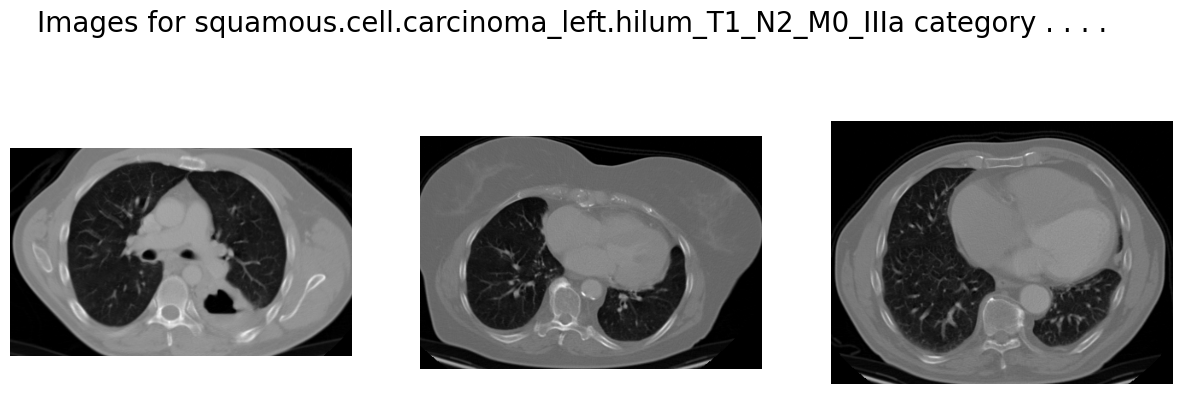

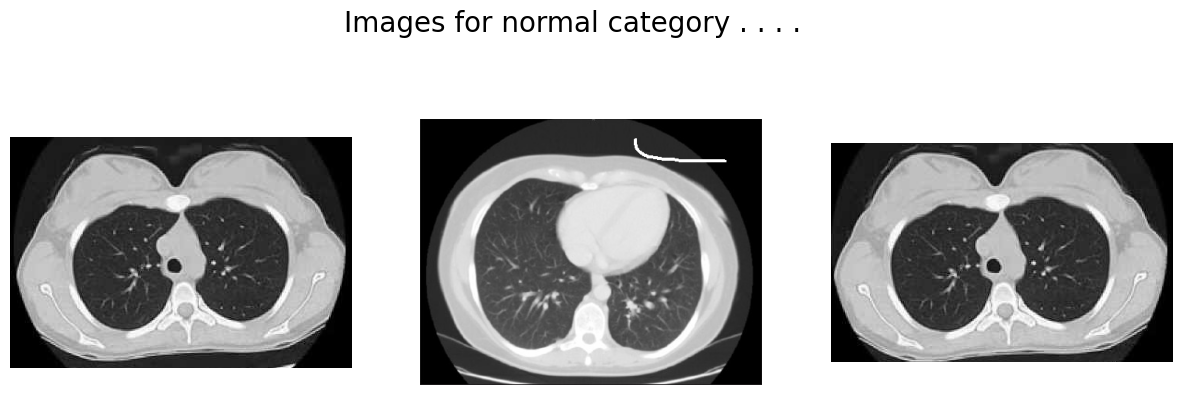

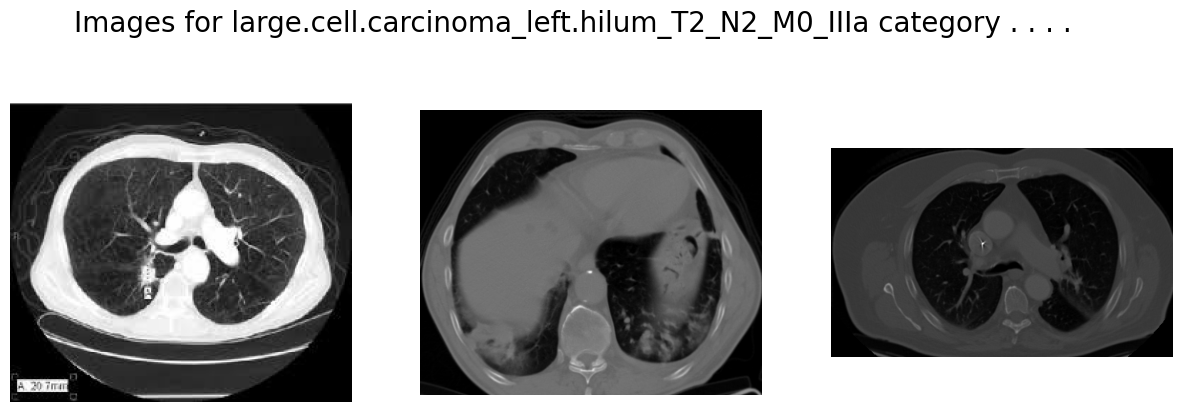

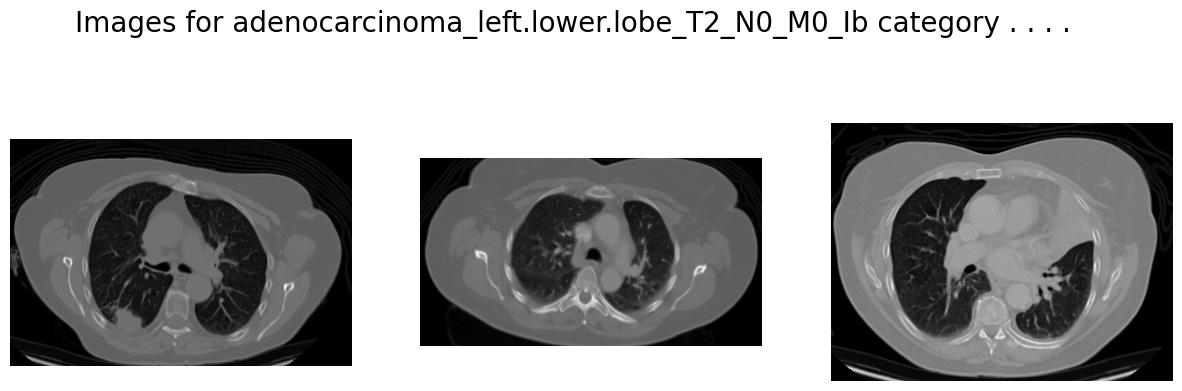

In [ ]:
path = 'Data/train'

for cat in classes:
    image_dir = f'{path}/{cat}'
    images = os.listdir(image_dir)

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Images for {cat} category . . . .', fontsize=20)

    for i in range(3):
        k = np.random.randint(0, len(images))
        img = np.array(Image.open(f'{path}/{cat}/{images[k]}'))
        ax[i].imshow(img)
        ax[i].axis('off')
    plt.show()


In [ ]:
IMG_SIZE = 256
SPLIT = 0.2
EPOCHS = 10
BATCH_SIZE = 64

X = []
Y = []

for i, cat in enumerate(classes):
  images = glob(f'{path}/{cat}/*.png')

  for image in images:
    img = cv2.imread(image)

    X.append(cv2.resize(img, (IMG_SIZE, IMG_SIZE)))
    Y.append(i)

X = np.asarray(X)
one_hot_encoded_Y = pd.get_dummies(Y).values

X_train, X_val, Y_train, Y_val = train_test_split(X, one_hot_encoded_Y, test_size=SPLIT, random_state=2022)


In [ ]:
model = keras.models.Sequential([
    layers.Conv2D(filters=32,
                  kernel_size=(5, 5),
                  activation='relu',
                  input_shape=(IMG_SIZE,
                               IMG_SIZE,
                               3),
                  padding='same'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(filters=64,
                  kernel_size=(3, 3),
                  activation='relu',
                  padding='same'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(filters=128,
                  kernel_size=(3, 3),
                  activation='relu',
                  padding='same'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(4, activation='softmax') # Change the output layer to 4 units
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 256, 256, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │      33,554,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,684,420 (128.50 MB)

 Trainable params: 33,683,652 (128.49 MB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)


In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') > 0.90:
            print('\n Validation accuracy has reached upto \
                      90% so, stopping further training.')


In [ ]:
            self.model.stop_training = True


es = EarlyStopping(patience=3,
                   monitor='val_accuracy',
                   restore_best_weights=True)

lr = ReduceLROnPlateau(monitor='val_loss',
                       patience=2,
                       factor=0.5,
                       verbose=1)


In [ ]:
#...(Your previous code)...

# After creating the 'classes'variable, print its length to check the number of classes:
print("Number of classes:",len(classes))

#...(Your code for loading and preprocessing data)...


Number of classes: 4


<Dense name=dense_7, built=False>

In [ ]:


# Adjust the final layer of the model:
layers.Dense(len(classes),activation='softmax')# Replace 3 with len(classes)

#...(Rest of your code)...

In [ ]:
history = model.fit(X_train, Y_train,
                    validation_data = (X_val, Y_val),
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS,
                    verbose = 1,
                    callbacks = [es, lr, myCallback()])


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 95s 11s/step - accuracy: 0.4823 - loss: 1.3846 - val_accuracy: 0.2562 - val_loss: 14.2711 - learning_rate: 0.0010
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 144s 12s/step - accuracy: 0.7477 - loss: 0.7323 - val_accuracy: 0.2727 - val_loss: 8.5670 - learning_rate: 0.0010
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 95s 12s/step - accuracy: 0.8300 - loss: 0.4617 - val_accuracy: 0.2727 - val_loss: 9.1050 - learning_rate: 0.0010
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 139s 12s/step - accuracy: 0.8913 - loss: 0.3414 - val_accuracy: 0.3388 - val_loss: 4.0243 - learning_rate: 0.0010
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 142s 12s/step - accuracy: 0.9030 - loss: 0.2674 - val_accuracy: 0.3140 - val_loss: 3.1846 - learning_rate: 0.0010
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 141s 11s/step - accuracy: 0.9595 - loss: 0.1528 - val_accuracy: 0.3058 - val_loss: 3.4251 - learning_rate: 0.0010
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 139s 11s/step - accuracy: 0.9556 - loss: 0.1435 - val_accuracy: 0

In [ ]:
history = model.fit(X_train, Y_train,
                    validation_data = (X_val, Y_val),
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS,
                    verbose = 1,
                    callbacks = [es, lr, myCallback()])


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 101s 12s/step - accuracy: 0.9928 - loss: 0.0396 - val_accuracy: 0.7107 - val_loss: 0.7793 - learning_rate: 0.0010
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 132s 11s/step - accuracy: 0.9983 - loss: 0.0315 - val_accuracy: 0.7521 - val_loss: 0.6467 - learning_rate: 0.0010
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.9927 - loss: 0.0295 

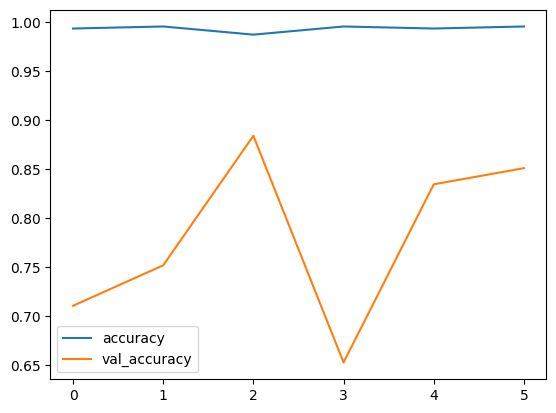

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['accuracy','val_accuracy']].plot()
plt.show()


In [ ]:
Y_pred = model.predict(X_val)
Y_val = np.argmax(Y_val, axis=1)
Y_pred = np.argmax(Y_pred, axis=1)
print(metrics.classification_report(Y_val, Y_pred,
                                    target_names=classes))


4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step
                                                  precision    recall  f1-score   support

squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa       0.84      0.93      0.89        29
                                          normal       1.00      1.00      1.00        33
   large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa       0.88      0.67      0.76        21
      adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib       0.82      0.87      0.85        38

                                        accuracy                           0.88       121
                                       macro avg       0.89      0.87      0.87       121
                                    weighted avg       0.89      0.88      0.88       121



In [ ]:
print(metrics.classification_report(Y_val, Y_pred,
                                    target_names=classes))


                                                  precision    recall  f1-score   support

squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa       0.84      0.93      0.89        29
                                          normal       1.00      1.00      1.00        33
   large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa       0.88      0.67      0.76        21
      adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib       0.82      0.87      0.85        38

                                        accuracy                           0.88       121
                                       macro avg       0.89      0.87      0.87       121
                                    weighted avg       0.89      0.88      0.88       121

